In [1]:
pip install scikit-learn


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv(r"C:\Users\siddu\Downloads\reduced_data.csv")
data.head()

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,29622,2021,NIT,1,HS,Gender-Neutral,NIT-Puducherry,Electrical and Electronics Engineering,4 Years,B.Tech,SC,10799,17190,0
1,11674,2021,IIT,1,AI,Gender-Neutral,IIT-(BHU) Varanasi,Industrial Chemistry,5 Years,B.Tech + M.Tech (IDD),SC,2529,2757,0
2,29411,2021,NIT,1,OS,Gender-Neutral,NIT-Nagaland,Electronics and Communication Engineering,4 Years,B.Tech,GEN,24910,32918,0
3,21537,2019,NIT,7,HS,Female-Only,NIT-Uttarakhand,Electrical and Electronics Engineering,4 Years,B.Tech,GEN,41703,41703,0
4,27836,2021,NIT,1,HS,Female-Only,NIT-Allahabad,Chemical Engineering,4 Years,B.Tech,GEN,22629,22723,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                9999 non-null   int64 
 1   year              9999 non-null   int64 
 2   institute_type    9999 non-null   object
 3   round_no          9999 non-null   int64 
 4   quota             9999 non-null   object
 5   pool              9999 non-null   object
 6   institute_short   9999 non-null   object
 7   program_name      9999 non-null   object
 8   program_duration  9999 non-null   object
 9   degree_short      9999 non-null   object
 10  category          9999 non-null   object
 11  opening_rank      9999 non-null   int64 
 12  closing_rank      9999 non-null   int64 
 13  is_preparatory    9999 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [5]:
filtered_data = data[data['institute_type'].isin(['IIT', 'NIT'])]

In [6]:
filtered_data = filtered_data.drop(columns=['id'])

In [7]:
print(filtered_data.isnull().sum())

year                0
institute_type      0
round_no            0
quota               0
pool                0
institute_short     0
program_name        0
program_duration    0
degree_short        0
category            0
opening_rank        0
closing_rank        0
is_preparatory      0
dtype: int64


In [8]:
filtered_data = filtered_data.dropna()

In [9]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              9999 non-null   int64 
 1   institute_type    9999 non-null   object
 2   round_no          9999 non-null   int64 
 3   quota             9999 non-null   object
 4   pool              9999 non-null   object
 5   institute_short   9999 non-null   object
 6   program_name      9999 non-null   object
 7   program_duration  9999 non-null   object
 8   degree_short      9999 non-null   object
 9   category          9999 non-null   object
 10  opening_rank      9999 non-null   int64 
 11  closing_rank      9999 non-null   int64 
 12  is_preparatory    9999 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 1015.7+ KB


In [10]:
categorical_cols = ['institute_type', 'quota', 'pool', 'institute_short', 'program_name', 'degree_short', 'category']
numerical_cols = ['year', 'round_no', 'program_duration']

In [11]:
encoder = OneHotEncoder(drop='first')

# Apply the encoder to the categorical columns
encoded_features = encoder.fit_transform(filtered_data[categorical_cols])

# Convert the sparse matrix to a DataFrame if necessary
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Add encoded features to the data
filtered_data = pd.concat([filtered_data[numerical_cols], encoded_features_df, filtered_data[['opening_rank', 'closing_rank']]], axis=1)




In [12]:
label_encoder = LabelEncoder()
data['quota'] = label_encoder.fit_transform(data['quota'])
data['institute_type' ] = label_encoder.fit_transform(data['institute_type' ])
data['institute_short' ] = label_encoder.fit_transform(data['institute_short'])
data['pool' ] = label_encoder.fit_transform(data['pool'])
data[ 'program_name'] = label_encoder.fit_transform(data[ 'program_name'])
data['program_duration'] = label_encoder.fit_transform(data['program_duration'])
data[ 'degree_short'] = label_encoder.fit_transform(data ['degree_short'])
data['category'] = label_encoder.fit_transform(data ['category'])


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                9999 non-null   int64
 1   year              9999 non-null   int64
 2   institute_type    9999 non-null   int64
 3   round_no          9999 non-null   int64
 4   quota             9999 non-null   int64
 5   pool              9999 non-null   int64
 6   institute_short   9999 non-null   int64
 7   program_name      9999 non-null   int64
 8   program_duration  9999 non-null   int64
 9   degree_short      9999 non-null   int64
 10  category          9999 non-null   int64
 11  opening_rank      9999 non-null   int64
 12  closing_rank      9999 non-null   int64
 13  is_preparatory    9999 non-null   int64
dtypes: int64(14)
memory usage: 1.1 MB


In [22]:
data.shape

(9999, 14)

In [14]:
# Sample DataFrame for illustration
import pandas as pd

filtered_data = pd.DataFrame({
    'institute_type': ['Type1', 'Type2', 'Type1', 'Type3'],
    'quota': ['Quota1', 'Quota2', 'Quota1', 'Quota3'],
    'pool': ['Pool1', 'Pool2', 'Pool1', 'Pool3'],
    'institute_short': ['Inst1', 'Inst2', 'Inst1', 'Inst3'],
    'program_name': ['ProgramA', 'ProgramB', 'ProgramA', 'ProgramC'],
    'degree_short': ['DegreeX', 'DegreeY', 'DegreeX', 'DegreeZ'],
    'category': ['Category1', 'Category2', 'Category1', 'Category3'],
    'program_duration': ['5 Years', '3 Years', '2 Years', '4 Years'],
    'opening_rank': [100, 200, 150, 250],
    'closing_rank': [110, 220, 160, 270]
})

# Check column names
print(filtered_data.columns)

# Define features and target after checking the columns
X = filtered_data.drop(columns=['opening_rank', 'closing_rank'])
y = filtered_data['closing_rank']



Index(['institute_type', 'quota', 'pool', 'institute_short', 'program_name',
       'degree_short', 'category', 'program_duration', 'opening_rank',
       'closing_rank'],
      dtype='object')


In [15]:
if 'Type3' in data.columns:
    # Convert 'Type3' column to float
    data['Type3'] = data['Type3'].astype(float)

# Display the first few rows to verify the change
data.head()

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,29622,2021,1,1,3,1,44,52,0,3,6,10799,17190,0
1,11674,2021,0,1,0,1,0,72,1,4,6,2529,2757,0
2,29411,2021,1,1,6,1,41,54,0,3,0,24910,32918,0
3,21537,2019,1,7,3,0,52,52,0,3,0,41703,41703,0
4,27836,2021,1,1,3,0,24,26,0,3,0,22629,22723,0


In [16]:
if 'Type3' in data.columns:
    # Convert 'Type3' column to float
    data['Type3'] = data['Type3'].astype(float)

# Assuming 'Type3' is part of your feature set, create X_train and y_train
# Example of splitting data into features (X) and target (y)
X = data.drop(columns=['closing_rank'])  # Assuming 'closing_rank' is the target variable
y = data['closing_rank']  # Target variable

# Split into training and testing sets (usually 80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Initialize the model for regression
model = RandomForestRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Get predictions
x_train_prediction = model.predict(X_train)

# Assuming y_train is already defined
training_data_mse = mean_squared_error(y_train, x_train_prediction)
print(f"Training Data MSE: {training_data_mse}")


Training Data MSE: 16026880.026904235


In [18]:
y_pred = model.predict(X_test)

# Assuming y_train is already defined
testing_data_mse = mean_squared_error(y_test, y_pred)
print(f"Testing Data MSE: {testing_data_mse}")

Testing Data MSE: 309862009.2125366


In [19]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 2271.8015800000003
Mean Squared Error: 309862009.2125366
Root Mean Squared Error: 17602.897750442582


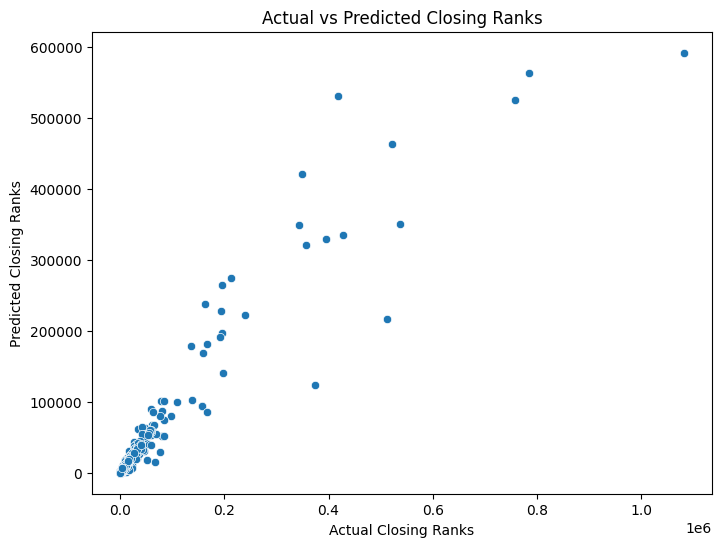

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Closing Ranks")
plt.ylabel("Predicted Closing Ranks")
plt.title("Actual vs Predicted Closing Ranks")
plt.show()

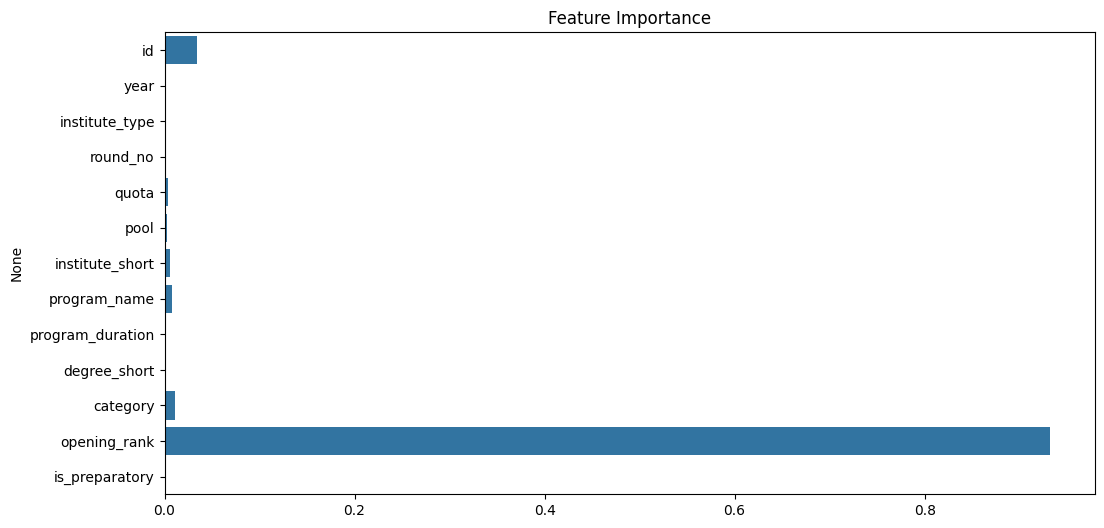

In [21]:
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()